In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [31]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
df = pd.read_csv(url)

In [32]:
len(df)

11914

In [33]:
selected_columns=[
'Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP'
]


In [34]:
df_sel=df[selected_columns]

In [35]:
data=df_sel
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [36]:
data=data.fillna(0)

In [37]:
data.rename(columns={'msrp':'price'},inplace=True)

In [38]:
price_mean = data.price.mean()
price_mean

data['above_average']=(data.price>price_mean).astype(int)

In [39]:
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [40]:
work_data=data.copy()

In [41]:
work_data['city_mpg']=work_data['city_mpg']
work_data['highway_mpg']=work_data['highway_mpg']

In [42]:
df_train_full, df_test = train_test_split(work_data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

assert len(data)==sum((len(df_train),len(df_val),len(df_test)))

In [43]:
len(df_train),len(df_val),len(df_test)

(7148, 2383, 2383)

In [44]:
del df_train_full['price']
del df_train['price']
del df_val['price']
del df_test['price']

In [45]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [46]:
categorical=['make', 'model','transmission_type', 'vehicle_style']
numerical=['year', 'engine_hp', 'engine_cylinders','highway_mpg', 'city_mpg']

In [47]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

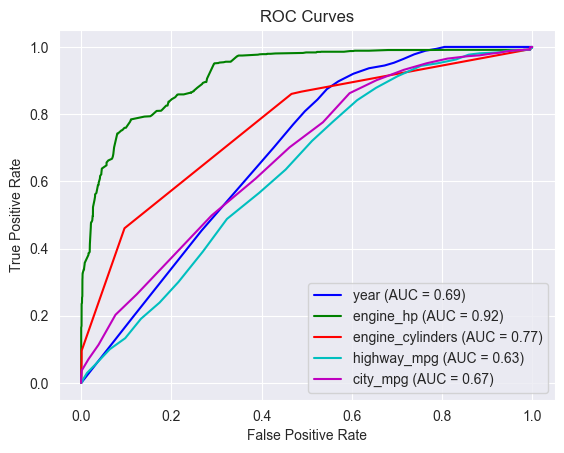

{'year': 0.687551492804683, 'engine_hp': 0.9171031265539011, 'engine_cylinders': 0.766116490165669, 'highway_mpg': 0.6330587871772013, 'city_mpg': 0.6734244643245233}


In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
scores={}
colors = ['b', 'g', 'r', 'c', 'm']
neg_num_features=['highway_mpg', 'city_mpg']
for feature in numerical:
    if feature in neg_num_features:
        neg_mod=-1
    else:
        neg_mod=1
    fpr, tpr, thresholds = roc_curve(df_train['above_average'].values,neg_mod*df_train[feature].values)
    scores[feature]=roc_auc_score(df_train['above_average'].values,neg_mod*df_train[feature].values)
    plt.plot(fpr, tpr, color=colors[numerical.index(feature)], label=f'{feature} (AUC = {scores[feature]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

# Show the plot
plt.show()

print(scores)

In [49]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27,1
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18,0
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19,0
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17,1
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17,0
...,...,...,...,...,...,...,...,...,...,...
7143,Subaru,Impreza,2015,148.0,4.0,MANUAL,4dr Hatchback,33,24,0
7144,Infiniti,QX50,2016,325.0,6.0,AUTOMATIC,4dr SUV,24,17,0
7145,Honda,Fit,2017,130.0,4.0,AUTOMATIC,4dr Hatchback,37,32,0
7146,Audi,200,1991,162.0,5.0,AUTOMATIC,Sedan,20,16,0


In [50]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [51]:


dv=DictVectorizer(sparse=True)

dict_train=df_train.to_dict(orient='records')
dict_val=df_val.to_dict(orient='records')
dict_test=df_test.to_dict(orient='records')

X_train=dv.fit_transform(dict_train)

X_val=dv.transform(dict_val)
X_test=dv.transform(dict_test)

In [52]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series',
       'model=1 Series M', 'model=100', 'model=124 Spider',
     

In [53]:
model=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [54]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [59]:
y_pred_v=model.predict(X_val)

In [60]:
roc_auc_score(y_val,y_pred_v)

0.9146693480348719

In [61]:
y_pred_v = model.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred_v)

0.9790336815928319

In [28]:
y_pred_t = model.predict(X_test)
roc_auc_score(y_test, y_pred_t)

0.9008809780023206

In [29]:
thresholds=np.linspace(0,1,100)

In [98]:
y_pred=model.predict_proba(X_val)[:,1]

In [99]:
y_pred

array([0.67345738, 0.00721739, 0.34487109, ..., 0.00432053, 0.99999442,
       0.05167217])

In [100]:
y_val

array([1, 0, 0, ..., 0, 1, 0])

In [101]:
scores=[]
for tr in thresholds:
    tp = ((y_pred >= tr) & (y_val == 1)).sum()
    fp = ((y_pred >= tr) & (y_val == 0)).sum()
    fn = ((y_pred < tr) & (y_val == 1)).sum()
    tn = ((y_pred < tr) & (y_val == 0)).sum()
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    scores.append((tr,precision,recall))

scores_df=pd.DataFrame(scores,columns=['tresh','precision','recall'])

scores_df

C:\Users\Sirius\AppData\Local\Temp\ipykernel_1532\3593777791.py:7: RuntimeWarning: invalid value encountered in scalar divide
  precision=tp/(tp+fp)


,tresh,precision,recall
0,0.000000,0.274444,1.000000
1,0.010101,0.461103,0.996942
2,0.020202,0.507405,0.995413
3,0.030303,0.542500,0.995413
4,0.040404,0.571178,0.993884
...,...,...,...
95,0.959596,0.996454,0.429664
96,0.969697,0.996255,0.406728
97,0.979798,1.000000,0.363914
98,0.989899,1.000000,0.311927


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


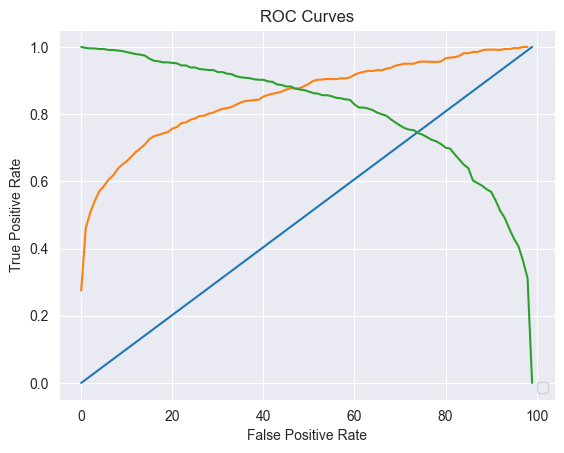

In [106]:
plt.plot(scores_df)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')

In [109]:
scores_df['f1']=2*((scores_df.precision*scores_df.recall)/(scores_df.precision+scores_df.recall))
scores_df

,tresh,precision,recall,f1
0,0.000000,0.274444,1.000000,0.430688
1,0.010101,0.461103,0.996942,0.630561
2,0.020202,0.507405,0.995413,0.672173
3,0.030303,0.542500,0.995413,0.702265
4,0.040404,0.571178,0.993884,0.725446
...,...,...,...,...
95,0.959596,0.996454,0.429664,0.600427
96,0.969697,0.996255,0.406728,0.577633
97,0.979798,1.000000,0.363914,0.533632
98,0.989899,1.000000,0.311927,0.475524


In [110]:
scores_df.f1.max()

0.8810641627543037

In [115]:
scores_df[(scores_df.f1>0.88)&(scores_df.f1<0.90)]

,tresh,precision,recall,f1
51,0.515152,0.899522,0.862385,0.880562
52,0.525253,0.902244,0.860856,0.881064


In [128]:
def train(df, y, C=1.0):
    df_dict=df[categorical+numerical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    dv.fit(df_dict)
    X=dv.transform(df_dict)
    model=LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X,y)
    return dv,model

def predict(df,dv,model):
    df_dict=df[categorical+numerical].to_dict(orient='records')
    X=dv.transform(df_dict)
    y_pred=model.predict_proba(X)[:, 1]
    return y_pred


In [136]:
categorical,numerical

(['make', 'model', 'transmission_type', 'vehicle_style'],
 ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg'])

In [122]:

from sklearn.model_selection import KFold


from tqdm.auto import tqdm

In [123]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.above_average.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

aucs

0it [00:00, ?it/s]

[0.9784891235596622,
 0.9774830122707483,
 0.984599297306341,
 0.9772593553064526,
 0.9776903651903652]

In [125]:
np.std(aucs), np.mean(aucs)

(0.0027786703256995177, 0.9791042307267139)

In [132]:
C_vals=[0.01, 0.1, 0.5, 10]

kfold = KFold(n_splits=5, shuffle=True, random_state=10)

scores=[]

for C in C_vals:
    aucs = []
    for train_idx, val_idx in tqdm(kfold.split(df_train_full)):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train.above_average.values

        df_val = df_train_full.iloc[val_idx]
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train,C=C)
        y_pred = predict(df_val, dv, model)

        rocauc = roc_auc_score(y_val, y_pred)
        aucs.append(rocauc)
    scores.append((C,np.mean(aucs),np.std(aucs)))

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [133]:
scores

[(0.01, 0.9514219494664309, 0.003690937742326089),
 (0.1, 0.9720717635055062, 0.002520888902766135),
 (0.5, 0.9780450914623368, 0.0029162396557597557),
 (10, 0.9827331611169623, 0.003933025941093542)]

In [135]:
pd.DataFrame(scores,columns=['C','mean','std dev'])

,C,mean,std dev
0,0.01,0.951422,0.003691
1,0.10,0.972072,0.002521
2,0.50,0.978045,0.002916
3,10.00,0.982733,0.003933
